#### importing libraries

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

#### check directory

In [2]:
pwd

'C:\\Users\\koanh'

In [3]:
cd C:\\Users\koanh\Desktop\Python\Data_Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis\


C:\Users\koanh\Desktop\Python\Data_Sales\Pandas-Data-Science-Tasks-master\SalesAnalysis


In [4]:
pwd

'C:\\Users\\koanh\\Desktop\\Python\\Data_Sales\\Pandas-Data-Science-Tasks-master\\SalesAnalysis'

#### read data

In [5]:
df = pd.read_csv("./Sales_Data/Sales_April_2019.csv")
dataframes = [dataframe for dataframe in os.listdir('./Sales_Data')]
for dataframe in dataframes:
    print(dataframe)


Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


#### merge monthly dataframes

In [6]:
all_months_data = pd.DataFrame()
for dataframe in dataframes:
    df = pd.read_csv("./Sales_Data/"+dataframe)
    all_months_data = pd.concat([all_months_data, df])
all_months_data.to_csv("all_months_data.csv", index = False)

#### read in updated data frame

In [7]:
all_data = pd.read_csv("all_months_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### clean data from NaNs

In [8]:
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()
all_data = all_data.dropna(how='all')

#### test additional columns

In [9]:
all_data['Test'] = "test"
all_data['Test2'] = "Month"
all_data.head()


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Test,Test2
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",test,Month
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",test,Month
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",test,Month
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",test,Month
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",test,Month


In [10]:
all_data = all_data.drop(columns=['Test', 'Test2'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### add month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04


#### Error: "invalid literal for int() with base 10: 'Or'"

In [12]:
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']


#### convert string columns to numbers where needed via 2 methods

In [13]:
all_data['Month'] = all_data['Month'].astype('int32')
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


#### add sales column

In [14]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


#### rearrange columns

In [15]:
all_data = all_data.loc[:, ["Order ID","Product","Quantity Ordered","Price Each","Sales","Order Date", "Month", "Purchase Address"]]
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,23.90,04/19/19 08:46,4,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,99.99,04/07/19 22:30,4,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,600.00,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,11.99,04/12/19 14:38,4,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,11.99,04/30/19 09:27,4,"333 8th St, Los Angeles, CA 90001"


#### find best selling month and plot it

In [25]:
monthly_sales = all_data.groupby('Month').sum()

Text(0.5, 0, 'Calendar Month')

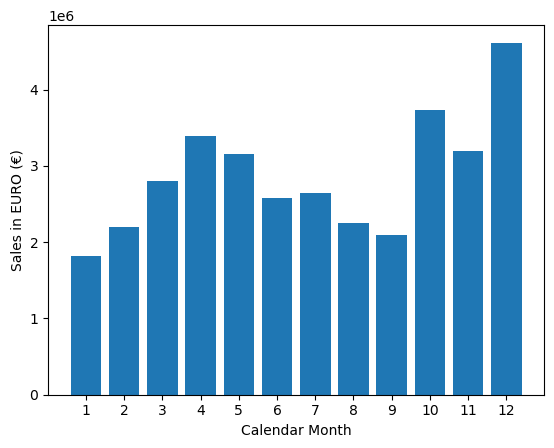

In [26]:
months = range(1,13)
plt.bar(months, monthly_sales['Sales'])
plt.xticks(months)
plt.ylabel('Sales in EURO (€)')
plt.xlabel('Calendar Month')

#### find best selling city and plot it

In [28]:
def get_city(address):
    return address.split(',')[1]
def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: get_city(x) + ' (' + get_state(x) + ')')

city_sales = all_data.groupby('City').sum()
city_sales.sort_values(by=['Sales'], ascending = False)








,Quantity Ordered,Price Each,Sales,Month
City,,,,
San Francisco (CA),50239,8211461.74,8262203.91,315520
Los Angeles (CA),33289,5421435.23,5452570.80,208325
New York City (NY),27932,4635370.83,4664317.43,175741
Boston (MA),22528,3637409.77,3661642.01,141112
Atlanta (GA),16602,2779908.20,2795498.58,104794
Dallas (TX),16730,2752627.82,2767975.40,104620
Seattle (WA),16553,2733296.01,2747755.48,104941
Portland (OR),11303,1860558.22,1870732.34,70621
Austin (TX),11153,1809873.61,1819581.75,69829


Text(0.5, 0, 'City name')

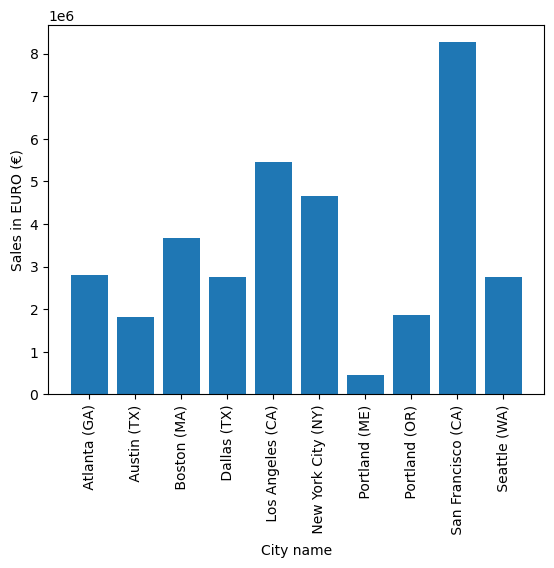

In [32]:
import matplotlib.pyplot as plt

# unique messes up order --> x and y values mismatch
#cities = all_data['City'].unique()

cities = [city for city, df in all_data.groupby('City')]

plt.bar(cities, city_sales['Sales'])
plt.xticks(cities, rotation='vertical')
plt.ylabel('Sales in EURO (€)')
plt.xlabel('City name')


#### find best selling time of day

In [33]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

In [37]:
all_data['Order Hour'] = all_data['Order Date'].dt.hour
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Order Hour
0,176558,USB-C Charging Cable,2,11.95,23.90,2019-04-19 08:46:00,4,"917 1st St, Dallas, TX 75001",Dallas (TX),8
2,176559,Bose SoundSport Headphones,1,99.99,99.99,2019-04-07 22:30:00,4,"682 Chestnut St, Boston, MA 02215",Boston (MA),22
3,176560,Google Phone,1,600.00,600.00,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14
4,176560,Wired Headphones,1,11.99,11.99,2019-04-12 14:38:00,4,"669 Spruce St, Los Angeles, CA 90001",Los Angeles (CA),14
5,176561,Wired Headphones,1,11.99,11.99,2019-04-30 09:27:00,4,"333 8th St, Los Angeles, CA 90001",Los Angeles (CA),9


Text(0, 0.5, 'Quantity of goods sold')

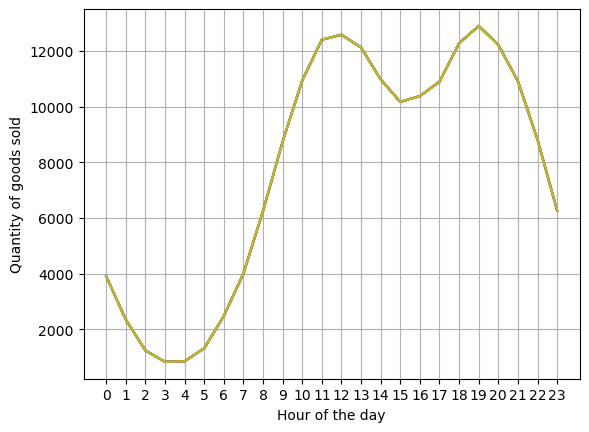

In [45]:
hours = [hour for hour, df in all_data.groupby('Order Hour')]

plt.plot(hours, all_data.groupby('Order Hour').count())
plt.xticks(hours)
plt.grid()
plt.xlabel('Hour of the day')
plt.ylabel('Quantity of goods sold')



#### find best selling product

In [85]:
product_sales = all_data.groupby('Product').count().sort_values(by =['Quantity Ordered'], ascending = False)
product_sales

,Order ID,Quantity Ordered,Price Each,Sales,Order Date,Month,Purchase Address,City,Order Hour
Product,,,,,,,,,
USB-C Charging Cable,21903,21903,21903,21903,21903,21903,21903,21903,21903
Lightning Charging Cable,21658,21658,21658,21658,21658,21658,21658,21658,21658
AAA Batteries (4-pack),20641,20641,20641,20641,20641,20641,20641,20641,20641
AA Batteries (4-pack),20577,20577,20577,20577,20577,20577,20577,20577,20577
Wired Headphones,18882,18882,18882,18882,18882,18882,18882,18882,18882
Apple Airpods Headphones,15549,15549,15549,15549,15549,15549,15549,15549,15549
Bose SoundSport Headphones,13325,13325,13325,13325,13325,13325,13325,13325,13325
27in FHD Monitor,7507,7507,7507,7507,7507,7507,7507,7507,7507
iPhone,6842,6842,6842,6842,6842,6842,6842,6842,6842


In [ ]:
#### plot best selling product 

Text(0.5, 0, 'Product name')

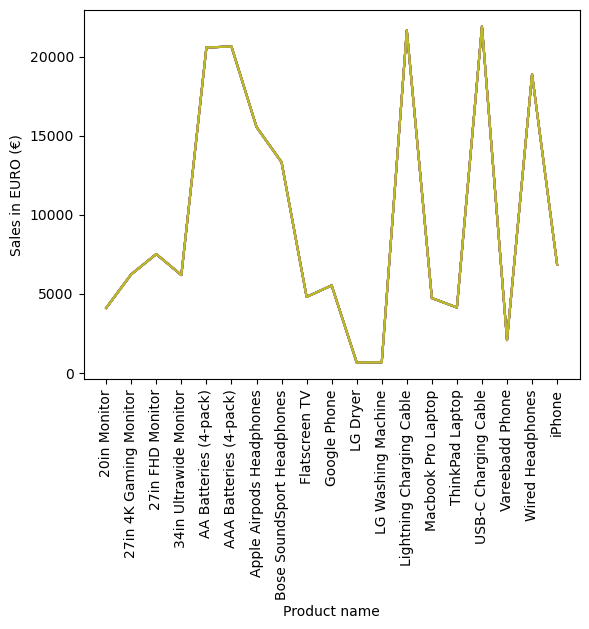

In [90]:
products = [product for product, df in all_data.groupby('Product')]

plt.plot(products, all_data.groupby('Product').count())
plt.xticks(products, rotation='vertical')
plt.ylabel('Sales in EURO (€)')
plt.xlabel('Product name')


#### plot most revenue product

Text(0.5, 0, 'Product name')

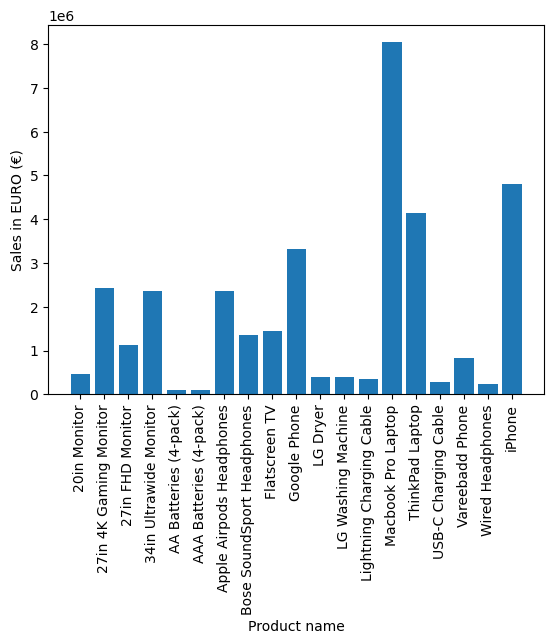

In [95]:

products = [product for product, df in all_data.groupby('Product')]
product_sales = all_data.groupby('Product').sum()

plt.bar(products, product_sales['Sales'])
plt.xticks(products, rotation='vertical')
plt.ylabel('Sales in EURO (€)')
plt.xlabel('Product name')




#### what products are most often sold together

In [70]:
#new data frame
#get rid of single orders by keeping duplicates

df = all_data[all_data['Order ID'].duplicated(keep=False)]

#create column with strings of grouped orders
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))
#drop duplicates
#WHY douple brackets? 
df = df[['Order ID', 'Grouped']].drop_duplicates()
df.head()


C:\Users\koanh\AppData\Local\Temp\ipykernel_122080\3451507224.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','. join(x))


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [83]:
#from stackoverflow

from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))

count.most_common(10)    

[(('iPhone', 'Lightning Charging Cable'), 1005),
 (('Google Phone', 'USB-C Charging Cable'), 987),
 (('iPhone', 'Wired Headphones'), 447),
 (('Google Phone', 'Wired Headphones'), 414),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 361),
 (('iPhone', 'Apple Airpods Headphones'), 360),
 (('Google Phone', 'Bose SoundSport Headphones'), 220),
 (('USB-C Charging Cable', 'Wired Headphones'), 160),
 (('Vareebadd Phone', 'Wired Headphones'), 143),
 (('Lightning Charging Cable', 'Wired Headphones'), 92)]